# Cluster moons dataset

Like in the 'cluster-balls-dataset' we try to cluster the moons dataset using KMeans. Let's see if this goes well...

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

Let's load the data from our CSV file and visualize it.

In [17]:
data = pd.read_csv('./data/moons.csv', names=['x', 'y'])
data

,x,y
0,-5.12260,0.74780
1,-4.64400,1.95300
2,5.80560,-2.03270
3,-3.78110,2.51670
4,4.41170,-2.62870
...,...,...
295,-0.74068,-0.78761
296,-5.50640,1.77450
297,-7.59600,-1.47060
298,6.95220,-0.54477


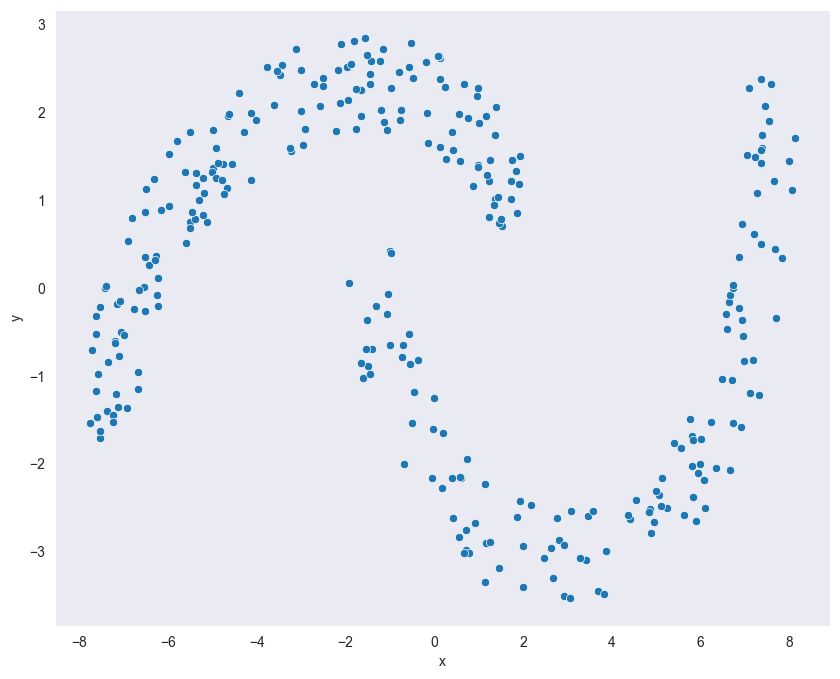

In [18]:
sns.scatterplot(data=data, x='x', y='y')
plt.grid()

Ok, we definitely see two different clusters for the data. Are we able to define those two clusters using the elbow method?

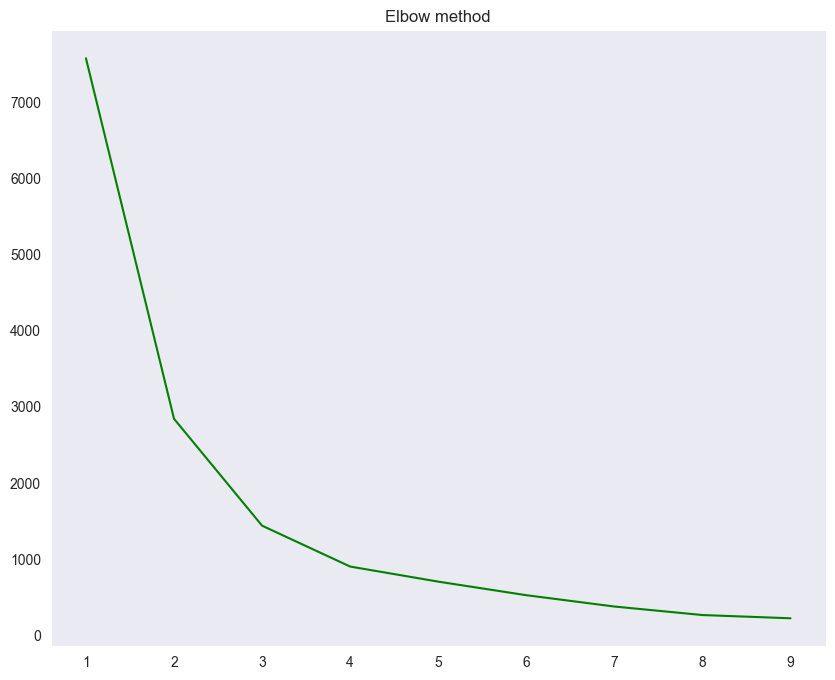

In [19]:
# store the inertias values for the visualization
inertias = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

sns.lineplot(
    x=range(1,10),
    y=inertias,
    color='green'
)
plt.rcParams.update({
    'figure.figsize': (10, 8),
    'figure.dpi': 100
})
plt.title('Elbow method')
plt.grid()
plt.show()

Ok, since the elbow function does not clearly say how many clusters are in the dataset, we will try to get them by ourselves...

In [20]:
print('Inertia values:')
for i in range(1,10):
    print(f'{i} : {inertias[i - 1]}')

Inertia values:
1 : 7573.377073191919
2 : 2843.6408858703544
3 : 1441.4529628698708
4 : 905.1603780220304
5 : 707.3127809744428
6 : 529.2674943885929
7 : 380.6606520425921
8 : 269.0434842351801
9 : 226.51947372509147


As said before, we got two different clusters, the moon to the left and the moon to the right.

In [21]:
kmeans = KMeans(n_clusters=2).fit(data)
kmeans.cluster_centers_

array([[ 4.01422205, -0.88132319],
       [-3.74621345,  0.90186587]])

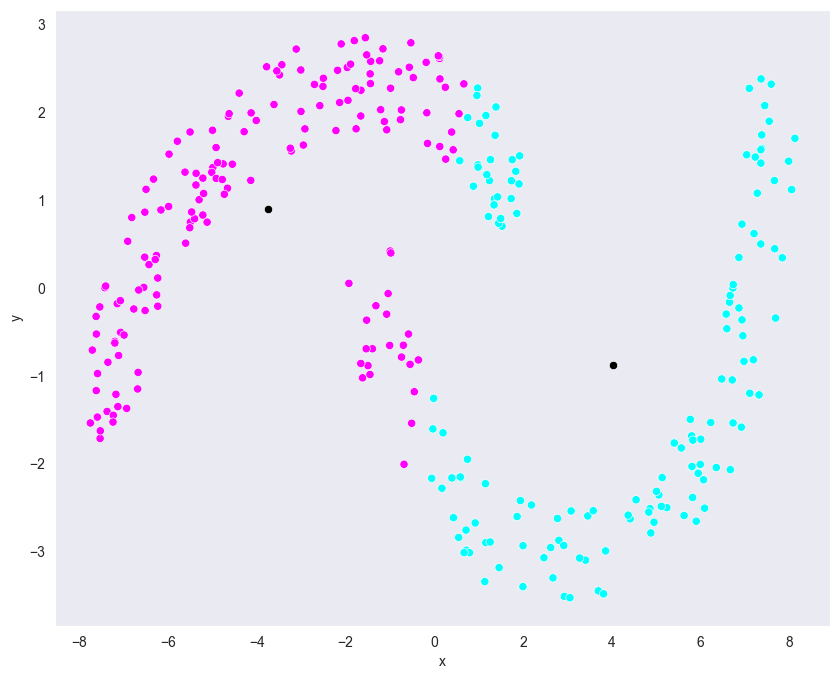

In [22]:
sns.scatterplot(
    data=data,
    x='x',
    y='y',
    c=kmeans.labels_,
    cmap='cool'
)
sns.scatterplot(
    x=kmeans.cluster_centers_[:, 0],
    y=kmeans.cluster_centers_[:, 1],
    c='black'
)
plt.grid()
plt.show()

Ok. Since the clustering didn't work well, let's try to change the number of clusters to get at least the moons separated...

In [23]:
kmeans = KMeans(n_clusters=4).fit(data)
kmeans.cluster_centers_

array([[ 1.72401287, -2.64217872],
       [ 6.53786567, -0.61235005],
       [-0.65884768,  1.50472518],
       [-6.11172963,  0.36926162]])

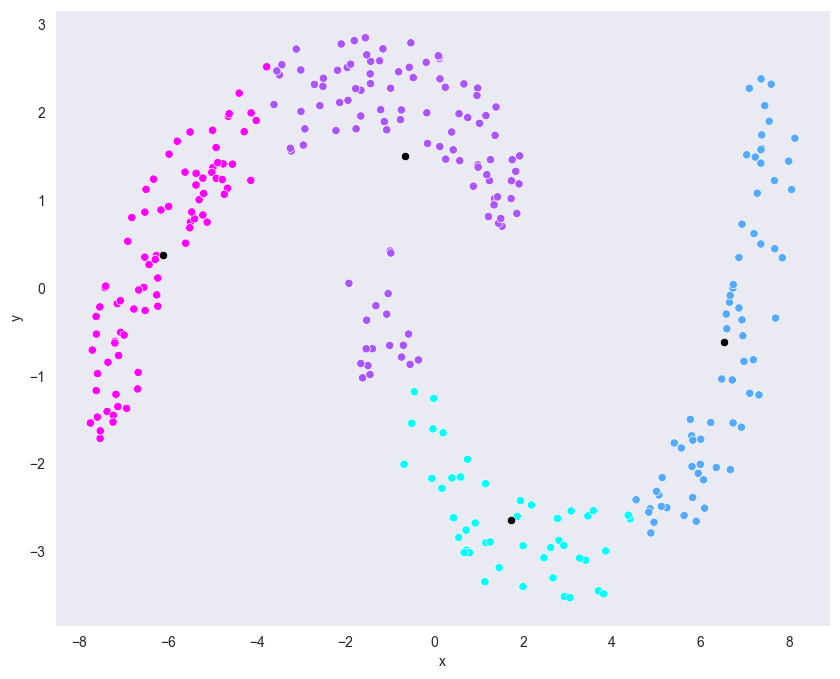

In [24]:
sns.scatterplot(
    data=data,
    x='x',
    y='y',
    c=kmeans.labels_,
    cmap='cool'
)
sns.scatterplot(
    x=kmeans.cluster_centers_[:, 0],
    y=kmeans.cluster_centers_[:, 1],
    c='black'
)
plt.grid()
plt.show()

Better, closer, warmer. But still not the goal we are aiming for. Let's see when k-Means is able to separate the moons from each other.

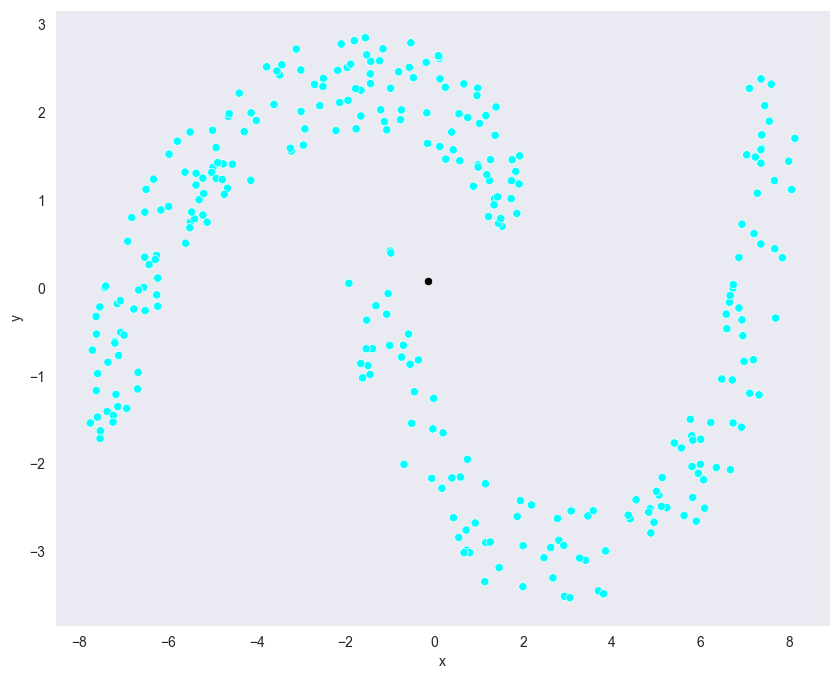

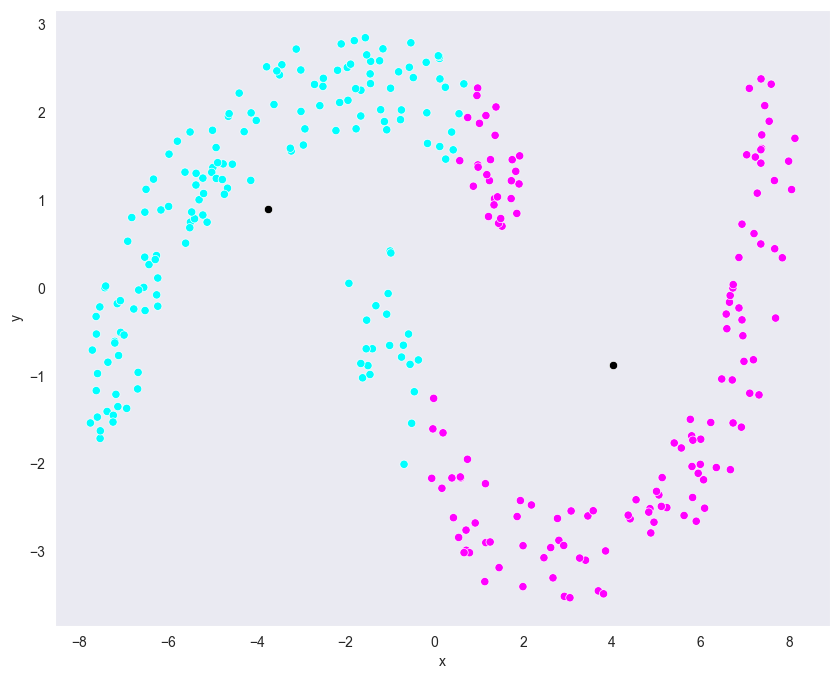

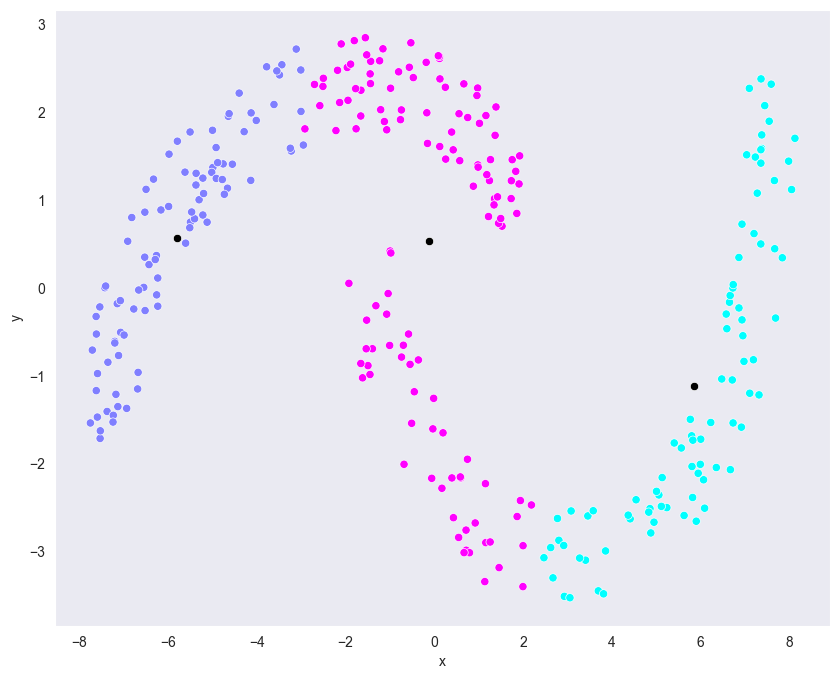

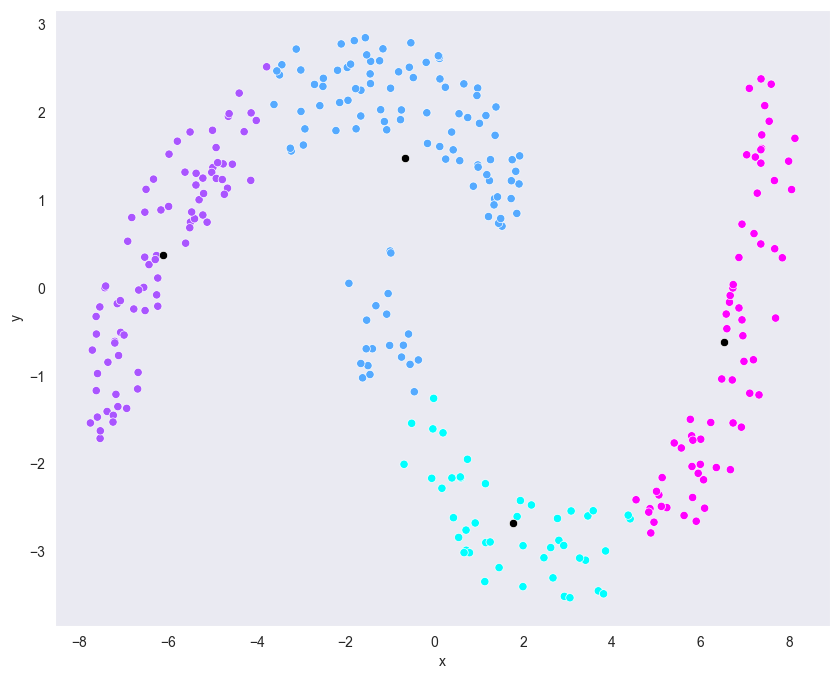

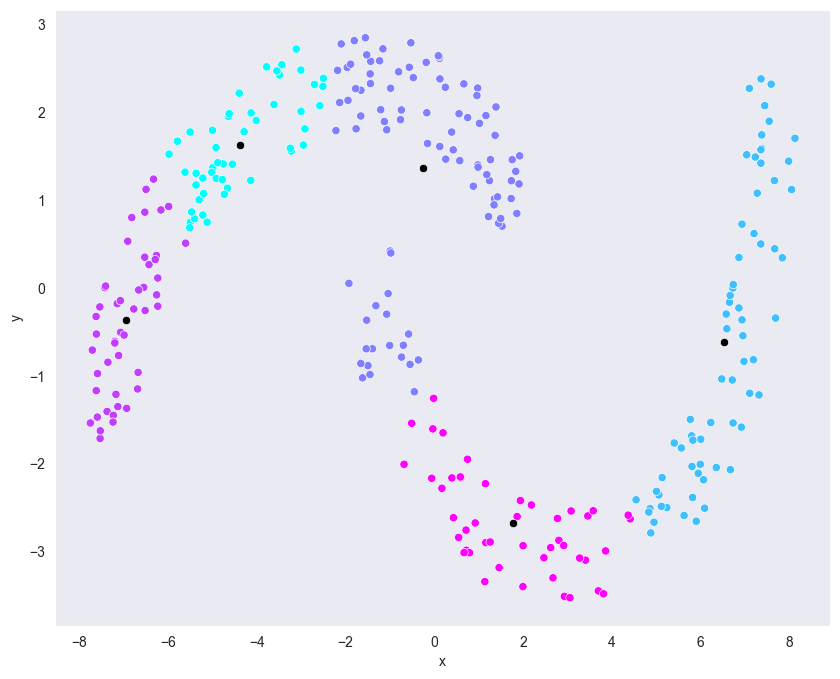

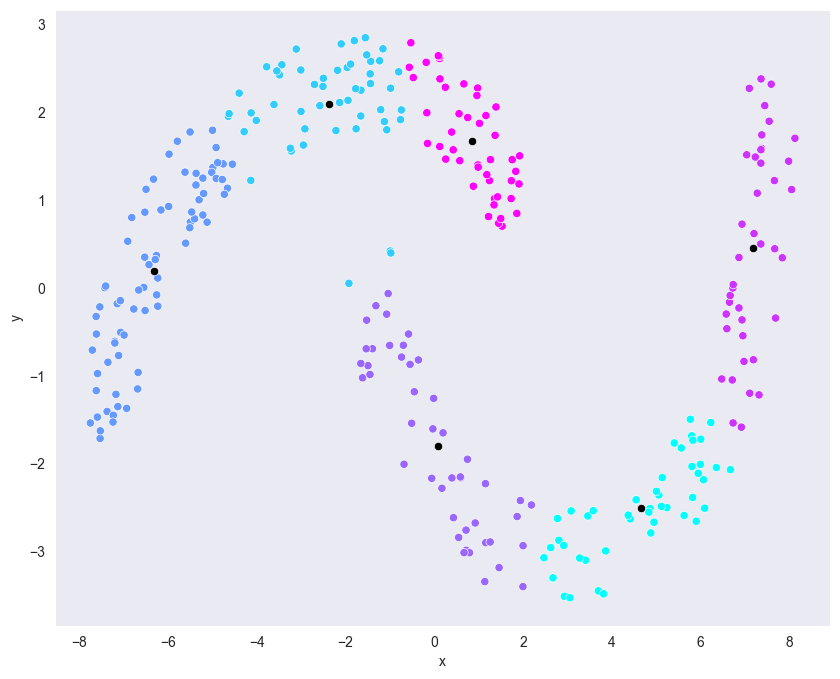

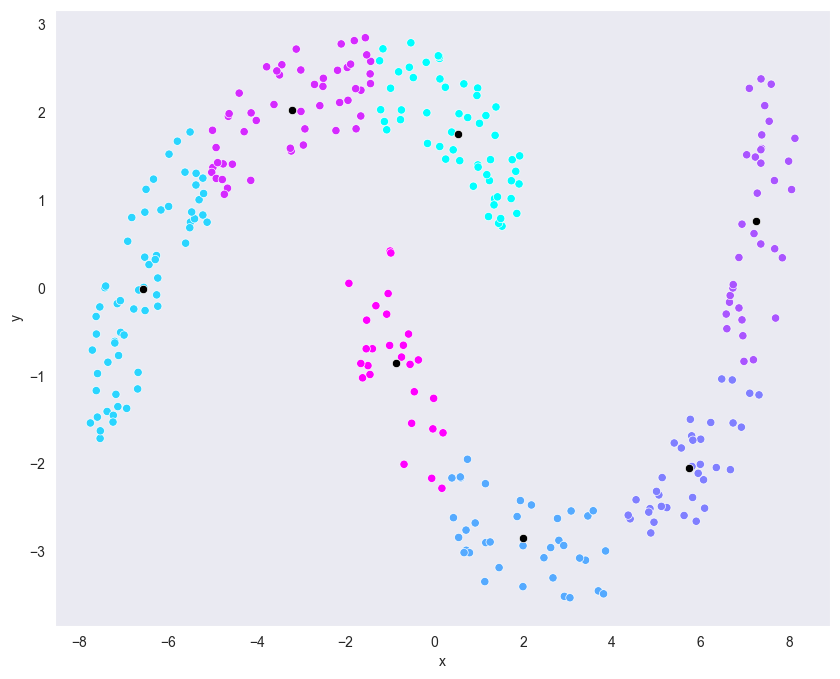

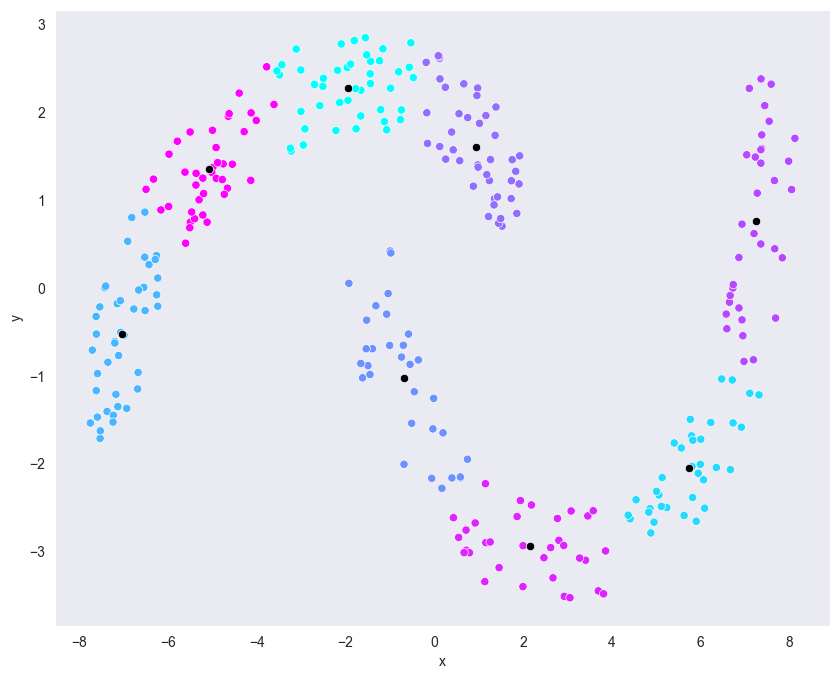

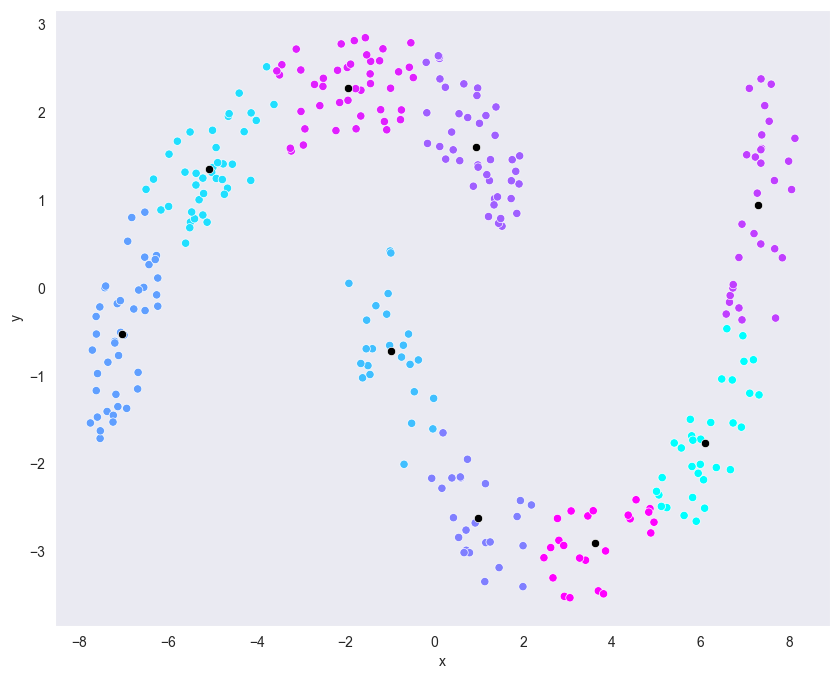

In [25]:
for i in range(1,10):
    kmeans = KMeans(n_clusters=i).fit(data)

    sns.scatterplot(
        data=data,
        x='x',
        y='y',
        c=kmeans.labels_,
        cmap='cool'
    )
    sns.scatterplot(
        x=kmeans.cluster_centers_[:, 0],
        y=kmeans.cluster_centers_[:, 1],
        c='black'
    )
    plt.grid()
    plt.show()

Using 6 or more clusters will get the separation between the two moons done. But, to be honest... we just have TWO moons, not 6. I guess in this case, k-Means is not the right choice here. We will try something different with this dataset to get our moons separated.